**FACTOR ANAYSIS OF MUTUAL FUNDS**

Factor Analysis of Mutual Funds is a quantitative technique used to understand and evaluate the underlying factors that drive the performance of mutual funds. It involves decomposing the returns of a mutual fund into various components, or "factors," which could be macroeconomic variables, market indices, or other financial metrics that influence fund returns.


**Fama French 3-factor model**

The Fama-French Three-Factor Model is an asset pricing model developed by Eugene Fama and Kenneth French in 1992. It expands on the traditional Capital Asset Pricing Model (CAPM) by adding two additional factors to better explain the returns of a portfolio or a stock. These factors are intended to capture the impact of size and value on stock returns.

The model posits that the returns of a portfolio or stock can be explained by three factors:

1. **Market Excess Return (Mkt-RF)**: This is the excess return of the market over the risk-free rate. It is the same as the CAPM’s market factor.

2. **SMB (Small Minus Big)**: This factor captures the size premium, which is the historical tendency for smaller companies to outperform larger companies.

3. **HML (High Minus Low)**: This factor captures the value premium, which is the historical tendency for value stocks (those with high book-to-market ratios) to outperform growth stocks (those with low book-to-market ratios).

**Use in Portfolio Management**
The Fama-French Three-Factor Model is widely used in finance to evaluate the performance of mutual funds, hedge funds, and other investment portfolios. By understanding how much of a portfolio's returns can be attributed to these three factors, investors can better understand the sources of risk and return in their investments.




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


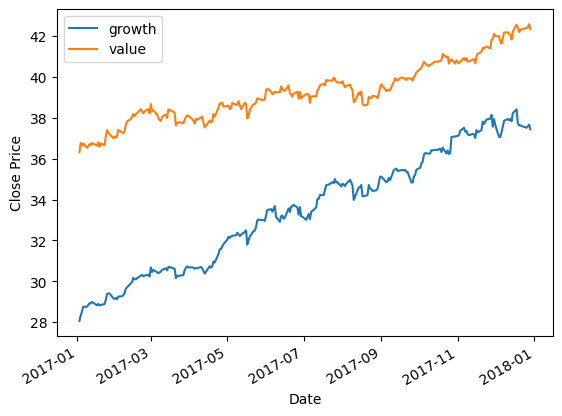

In [25]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
growth_fund = yf.download('TPLGX','2017-01-01','2018-01-01')
growth_fund.Close.plot()
value_fund = yf.download('VMCIX','2017-01-01','2018-01-01')
value_fund.Close.plot()
plt.legend(['growth','value'])
plt.ylabel('Close Price')
plt.show()

In [26]:
growth_fund = yf.download('TPLGX','2006-12-01','2018-01-01',interval='1mo')
value_fund = yf.download('VMCIX','2006-12-01','2018-01-01',interval='1mo')
growth_fund['Returns'] =  np.log(growth_fund['Adj Close'] / growth_fund['Adj Close'].shift(1)) *100
value_fund['Returns'] =  np.log(value_fund['Adj Close'] / value_fund['Adj Close'].shift(1)) *100
growth_fund = growth_fund.dropna()
value_fund = value_fund.dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [27]:
fama_factors = pd.read_csv('/content/FF_Factors.CSV',names=['Mkt-RF','SMB','HML','RF'])
growth_fund['MKT RF'] = list(fama_factors['Mkt-RF'][1:]);growth_fund['SMB'] = list(fama_factors['SMB'][1:]);
growth_fund['HML'] = list(fama_factors['HML'][1:]); growth_fund['RF'] = list(fama_factors['RF'][1:])
growth_fund['Excess Returns'] = [float(list(growth_fund.Returns)[i]) - float(list(growth_fund.RF)[i]) for i in range(len(growth_fund.Returns))]
value_fund['MKT RF'] = list(fama_factors['Mkt-RF'][1:]);value_fund['SMB'] = list(fama_factors['SMB'][1:]);
value_fund['HML'] = list(fama_factors['HML'][1:]); value_fund['RF'] = list(fama_factors['RF'][1:])
value_fund['Excess Returns'] = [float(list(value_fund.Returns)[i]) - float(list(value_fund.RF)[i]) for i in range(len(value_fund.Returns))]

In [28]:
growth_fund.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,MKT RF,SMB,HML,RF,Excess Returns
Date,,,,,,,,,,,,
2007-01-01,13.28,13.64,13.26,13.51,10.129484,0,2.165560,1.4,0.1,-0.11,0.44,1.725560
2007-02-01,13.60,13.75,13.13,13.23,9.919545,0,-2.094333,-1.96,1.32,-0.09,0.38,-2.474333
2007-03-01,13.18,13.53,12.90,13.31,9.979527,0,0.602867,0.68,-0.06,-0.22,0.43,0.172867
2007-04-01,13.38,14.23,13.38,14.08,10.556856,0,5.623978,3.49,-2.06,-1.15,0.44,5.183978
2007-05-01,14.11,14.60,14.11,14.60,10.946741,0,3.626627,3.24,0.03,-0.05,0.41,3.216627


In [29]:
value_fund.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,MKT RF,SMB,HML,RF,Excess Returns
Date,,,,,,,,,,,,
2007-01-01,19.799999,20.549999,19.680000,20.549999,15.849777,0,4.936499,1.4,0.1,-0.11,0.44,4.496499
2007-02-01,20.709999,21.270000,20.500000,20.559999,15.857499,0,0.048707,-1.96,1.32,-0.09,0.38,-0.331293
2007-03-01,20.480000,21.000000,19.850000,20.740000,15.996330,0,0.871682,0.68,-0.06,-0.22,0.43,0.441682
2007-04-01,20.850000,21.830000,20.850000,21.500000,16.586531,0,3.623162,3.49,-2.06,-1.15,0.44,3.183162
2007-05-01,21.549999,22.430000,21.549999,22.430000,17.303980,0,4.234556,3.24,0.03,-0.05,0.41,3.824556


In [34]:
y = growth_fund['Excess Returns']
X = growth_fund.iloc[:,[7,8,9]]
X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Excess Returns   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     495.2
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           3.20e-70
Time:                        15:10:50   Log-Likelihood:                -226.69
No. Observations:                 132   AIC:                             461.4
Df Residuals:                     128   BIC:                             472.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0837      0.122     -0.689      0.4

In [35]:
results.pvalues['const']

0.4923649191142716

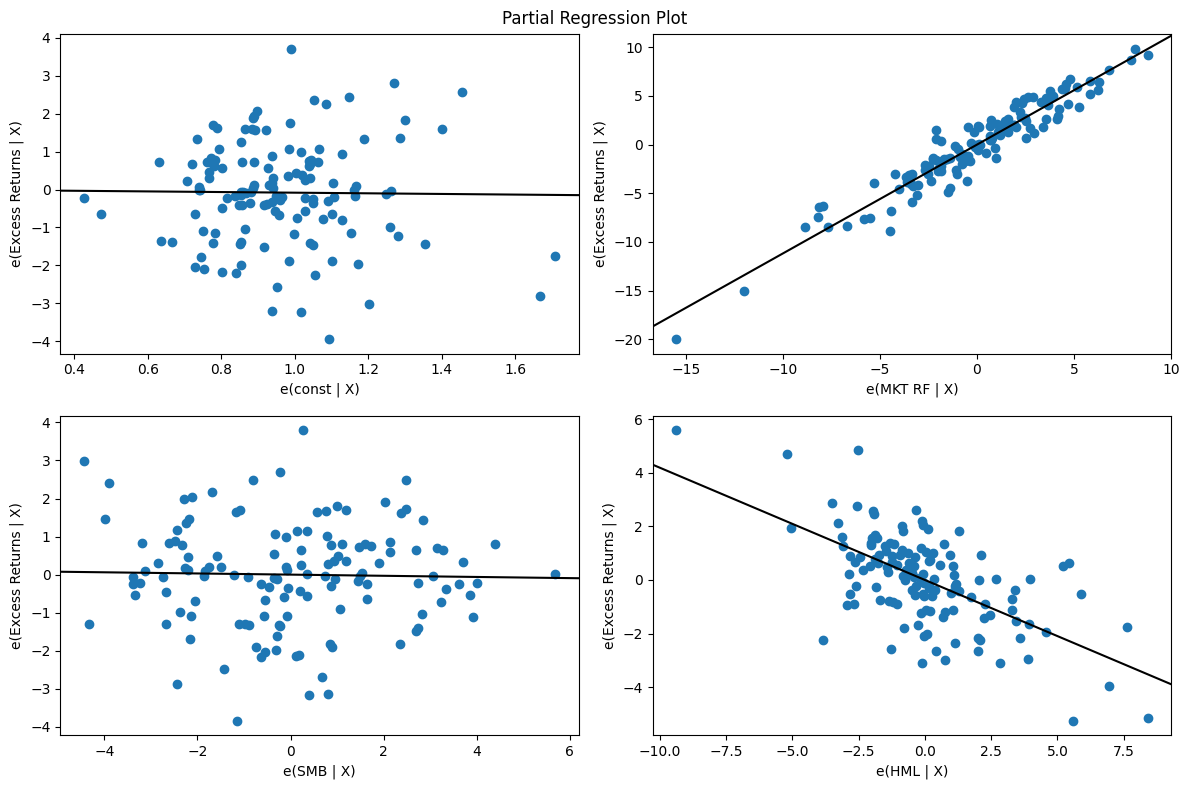

In [36]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig = fig)
plt.show()

In [37]:
y = value_fund['Excess Returns']
X = value_fund.iloc[:,[7,8,9]]
X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Excess Returns   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     706.4
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           2.00e-79
Time:                        15:10:56   Log-Likelihood:                -210.98
No. Observations:                 132   AIC:                             430.0
Df Residuals:                     128   BIC:                             441.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1988      0.108     -1.841      0.0

In [38]:
results.pvalues['const']

0.06787952892887529

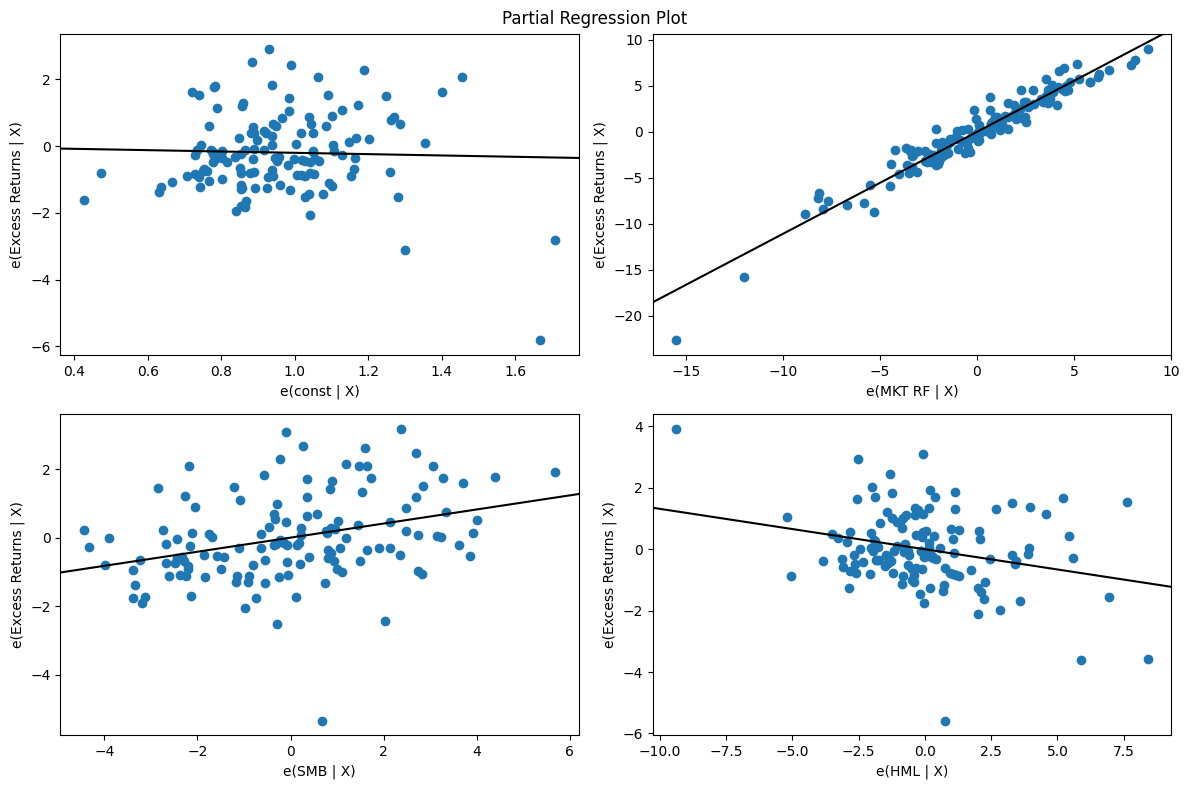

In [39]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig = fig)
plt.show()

**Interpretation**

**Market Factor (Mkt-RF):** Captures the overall market risk. A portfolio or stock with a higher beta will be more sensitive to market movements.

**Size Factor (SMB)**: A positive loading indicates a tilt towards smaller-cap stocks, which have historically provided higher returns than large-cap stocks.

**Value Factor (HML)**: A positive loading indicates a tilt towards value stocks, which have historically outperformed growth stocks.
